In [1]:
import pygsti
import matplotlib.pyplot as plt
from pygsti.extras import drift
import numpy as np
from data_list_creator import create_data
from helpers import *
from drift_file_io import drift_input, calculate_average_timestep, merge_lines
savepath = None

###########################################Manipulate variables here ###############################################
gate_list = gate_string_to_list("(Gx)^49")
nSamples = 8000  #total samples to take for each measurement
nCounts = 1   #total shots to take at one; =nSamples: same noise, probabilities for all repeats; =1, new experiment & noise for each count
time_per_count = 1/60 #seconds
time_units = 1e-3 #seconds
res = 1
noise_type='Sine' #Sine, Random Walk, Telegraph
plot_noise=True
add_noise=None
walking_amp = 0.0001
freq_list=[1.2]
amp_list=[0.0057]
phase_list=[0]
freq_list = tuple(freq_list)
amp_list = tuple(amp_list)
phase_list = tuple(phase_list)
telegraph_amp = 0.02
start_f = 0.1
stop_f = 2
fluctuators= 40
dc_angle_offset=0
constant_linear_drift=0.00 #rad/s
#################################################################################################################
##################################################################################################################
##############################################################################################################
#Don't change anything below this line for regular program operation
#calculate timestep (per sample) for simulated data, extract avg from experimental data
ones_count_array, zeros_count_array,timestamp_array, probs_array, ideal_angles, angles, sig\
= create_data(time_per_count, nSamples, nCounts, gate_list, \
                                                                                    time_units, noise_type, walking_amp, telegraph_amp,\
                                                                                    res, freq_list, amp_list, phase_list, start_f, stop_f,\
                                                                                    fluctuators,plot_noise,add_noise,None,dc_angle_offset, constant_linear_drift)
time_per_sample = nCounts*time_per_count #time for a full sample (one bitstring) of data

    
#calculate results and print relevant information
print("Time per sample/timestep: {:.4f}".format(time_per_sample))
print("Samples per second: {:.2f}".format(1/time_per_sample))
nCounts = ones_count_array[0] + zeros_count_array[0] #the number of samples per timestep (zeros or ones)
print("Counts per timestep (sample): {}".format(nCounts))
print("Total Samples/Timesteps: {}".format(len(timestamp_array)))
print("Total time of Data Collection: {} s".format(timestamp_array[len(timestamp_array) - 1] - timestamp_array[0]))
drifted = drift.do_basic_drift_characterization(ones_count_array, counts=nCounts, timestep=time_per_sample,timestamps=timestamp_array, verbosity=0)
drifted.plot_power_spectrum(sequence=0, entity=0, outcome=1, savepath=savepath)

#analyze the frequency-power spectrum
frequencies = list(drifted.frequencies)
power_spectrum = list(drifted.pspepo_power_spectrum[0,0,1,:])
grouped = []
for i in range(len(frequencies)):
    grouped.append((frequencies[i], power_spectrum[i]))
sorted_groups = sorted(grouped, key=lambda tup: tup[1], reverse=True)
num_points = 5
for i in range(num_points):
    print("#{} Frequency: {:.4f} Hz".format(i+1, sorted_groups[i][0]))
#print("Spacing is {:.4f} Hz".format(frequencies[1]-frequencies[0]))

print("Highest frequency tested is {:.3f} Hz".format(frequencies[len(frequencies) - 1]))   

C:\Users\GA28573\Documents\pyGSTi-master\packages\pygsti\tools\matrixtools.py:23: UserWarning: Could not import Cython extension - falling back to slower pure-python routines
  _warnings.warn("Could not import Cython extension - falling back to slower pure-python routines")


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1500x300 with 1 Axes>

Time per sample/timestep: 0.0167
Samples per second: 60.00
Counts per timestep (sample): 1
Total Samples/Timesteps: 7999
Total time of Data Collection: 133.3 s


<Figure size 1500x300 with 1 Axes>

#1 Frequency: 1.1964 Hz
#2 Frequency: 1.2039 Hz
#3 Frequency: 23.1854 Hz
#4 Frequency: 21.1489 Hz
#5 Frequency: 23.9805 Hz
Highest frequency tested is 29.996 Hz


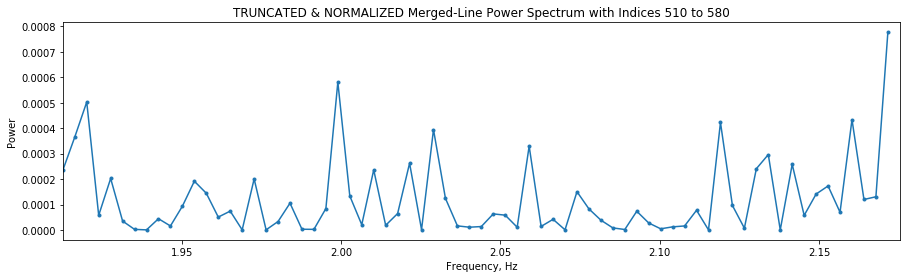

In [2]:
###################This cell is for truncating data and only seeing certain frequencies
mindex =510
maxdex = 580#len(frequencies)-1

fig = plt.figure(figsize=(15,4))
plt.plot(frequencies[mindex:maxdex], np.asarray(power_spectrum[mindex:maxdex])/nSamples,ls="solid",marker='.')
plt.xlabel("Frequency, Hz")
plt.ylabel("Power")
plt.xlim((frequencies[mindex], frequencies[maxdex]))
plt.title("TRUNCATED & NORMALIZED Merged-Line Power Spectrum with Indices {} to {}".format(mindex, maxdex))
plt.show()

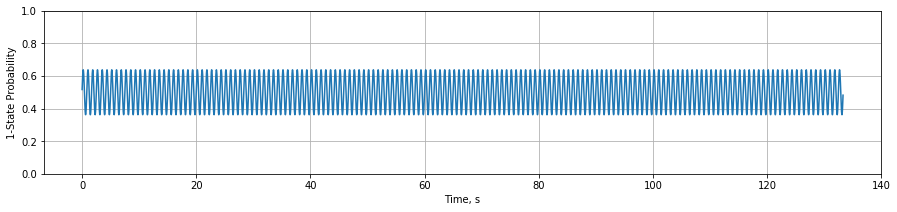

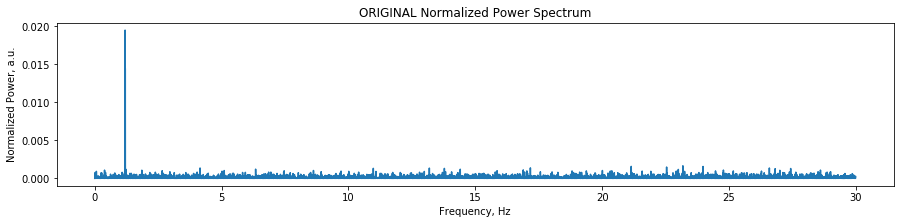

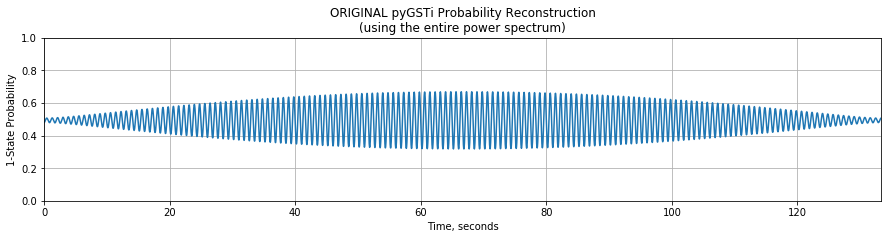

Using 1.1964 and 1.2039 Hz, with summed power 539.5754257453752


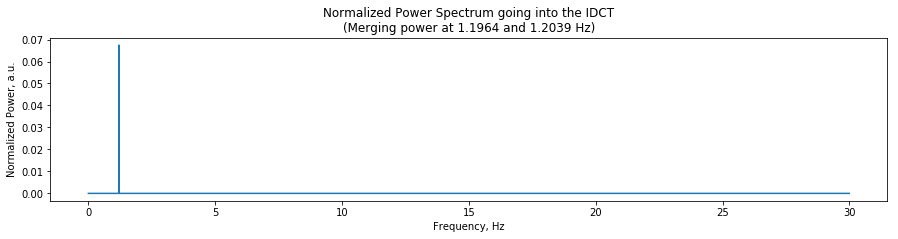

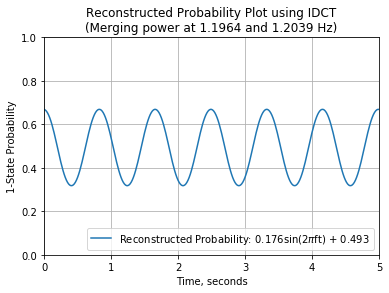

Frequency: 1.200 Hz
Amplitude: 0.176


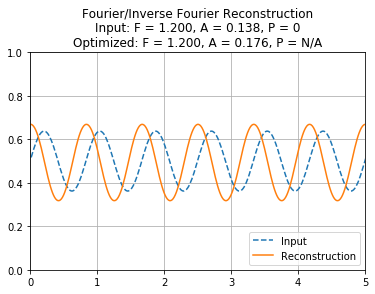

In [3]:
############### Do an Inverse FT on the modified power spectrum
if True:
    plt.figure(figsize=(15,3))
    plt.plot(timestamp_array, probs_array)
    plt.xlabel("Time, s")
    plt.ylabel("1-State Probability")
    plt.ylim(0,1)
    plt.grid()
    plt.show()
    central_freq = 1.2
    freq_band = 0.1
    print_info = True
    plot_original = True
    plot_results = True
    plot_range = (0, 5) #time in seconds to plot of the reconstructed function
    reconstructed_prob, reconst_freq, reconst_amplitude = multi_frequency_reconstruction(drifted, central_freq, freq_band,\
                                    print_info=print_info, \
                                        plot_original=plot_original, plot_results=plot_results, plot_range=plot_range)
    
    
    plt.plot(timestamp_array, probs_array, ls='dashed', label='Input')
    plt.plot(timestamp_array, reconstructed_prob, label='Reconstruction')
    plt.title("Fourier/Inverse Fourier Reconstruction\nInput: F = {:.3f}, A = {:.3f}, P = 0\nOptimized: F = {:.3f}, A = {:.3f}, P = N/A".
              format(freq_list[0], np.max(probs_array) - 0.5, reconst_freq, reconst_amplitude))
    plt.ylim(0,1)
    plt.xlim(0,5)
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

C:\Users\GA28573\AppData\Local\Continuum\anaconda32\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



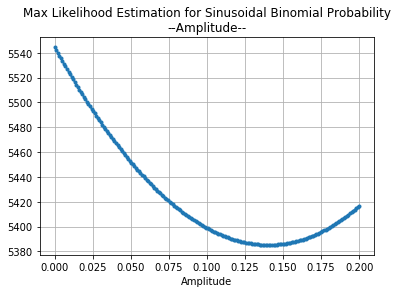

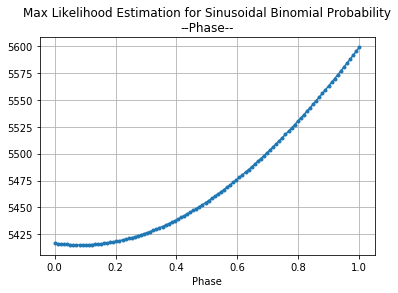

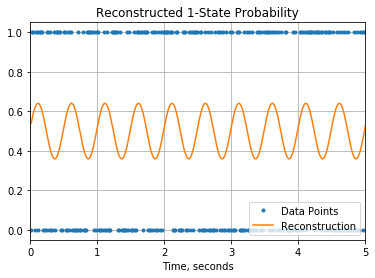

Frequency: 2.000 Hz
Amplitude: 0.141
Phase: 0.0817 radians



In [4]:
from max_likelihood import loss, variable_loss, p1, p0, MLE
guess_values = (1.2, 0.2, 0)
freq_range = np.linspace(1.8, 2.2, 50)
amp_range = np.linspace(0.00, 0.2, 200)
phase_range = np.linspace(0.001, 1, 100)
form = 'sine' #'sine', 'square', or 'saw' (square allows you to specify a tpp)

if True:
    opt_times, opt_probs, f, a, p = MLE(timestamp_array, ones_count_array, guess_values, freq_range, amp_range,\
                               phase_range, form, tpp=None, input_f = 2, input_a=None,\
                               input_p=None, plot_range=(0,5))
   
    

Scanning amp & phase with F = 1.190 Hz
Scanning amp & phase with F = 1.192 Hz
Scanning amp & phase with F = 1.193 Hz
Scanning amp & phase with F = 1.195 Hz
Scanning amp & phase with F = 1.196 Hz
Scanning amp & phase with F = 1.198 Hz
Scanning amp & phase with F = 1.199 Hz
Scanning amp & phase with F = 1.201 Hz
Scanning amp & phase with F = 1.202 Hz
Scanning amp & phase with F = 1.204 Hz
Scanning amp & phase with F = 1.205 Hz
Scanning amp & phase with F = 1.207 Hz
Scanning amp & phase with F = 1.208 Hz
Scanning amp & phase with F = 1.210 Hz


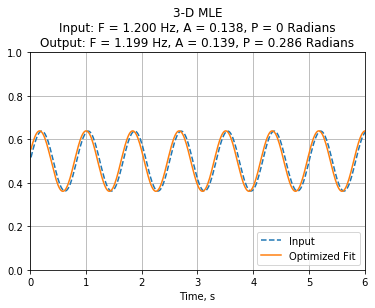

In [5]:
from max_likelihood import two_dimensional_optimization, three_dimensional_optimization
if True:
    f_range=np.linspace(1.19, 1.21, 14)
    a_range=np.linspace(0.12, 0.18, 20)
    p_range=np.linspace(0, np.pi, 12)
    form='sine'
    losses, opt_prob, opt_params = three_dimensional_optimization(
        timestamp_array, ones_count_array, f_range, a_range, p_range, form=form)
    
    plt.plot(timestamp_array, probs_array, ls='dashed', label="Input")
    plt.plot(timestamp_array, opt_prob, label="Optimized Fit")
    plt.xlabel("Time, s")
    plt.title("3-D MLE\nInput: F = {:.3f} Hz, A = {:.3f}, P = 0 Radians\nOutput: F = {:.3f} Hz, A = {:.3f}, P = {:.3f} Radians".format(freq_list[0], np.max(probs_array) - 0.5, opt_params[0], opt_params[1], opt_params[2]))
    plt.xlim(0, 6)
    plt.ylim(0, 1)
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()

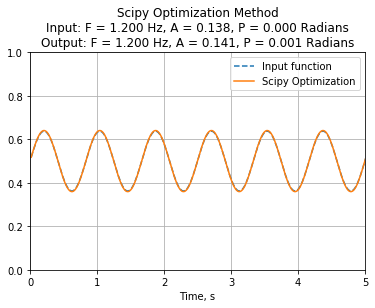

In [9]:
###### Do the scipy optimization method here.
if True:       
    from max_likelihood import scipy_optimization
    guess_params = (1.2, 0.2, 0)
    opt_params = scipy_optimization(timestamp_array, ones_count_array, guess_params, form, actual_params=(freq_list[0], np.max(probs_array) - 0.5, 0))